In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('train.csv')

In [30]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [92]:
df[['srch_destination_id','hotel_cluster']].value_counts()

srch_destination_id  hotel_cluster
8250                 1                309484
8791                 65               177405
8250                 45               177232
8267                 56               167721
8250                 79               167188
                                       ...  
24213                82                    1
45040                81                    1
                     68                    1
                     48                    1
65107                76                    1
Length: 396024, dtype: int64

<AxesSubplot:title={'center':'Number of occurances of search_destination id'}>

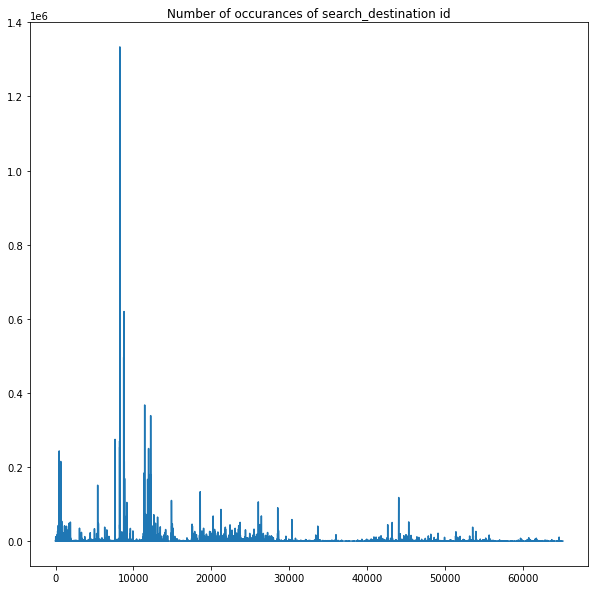

In [137]:
df.srch_destination_id.value_counts().sort_index().plot(figsize=(10,10),title= 'Number of occurances of search_destination id')

In [31]:
df.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [ ]:
# def get_date(time):
#     return time[:10]

<AxesSubplot:title={'center':'Number of records per Day'}>

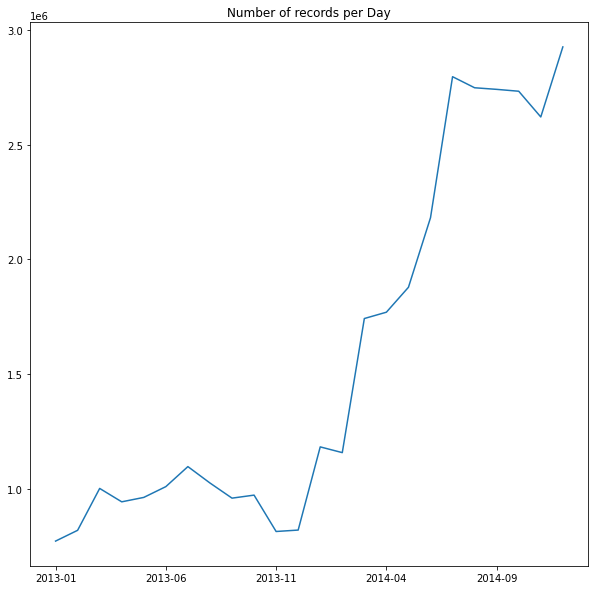

In [136]:
df.month.value_counts().sort_index().plot(figsize=(10,10),title= 'Number of records per Day')

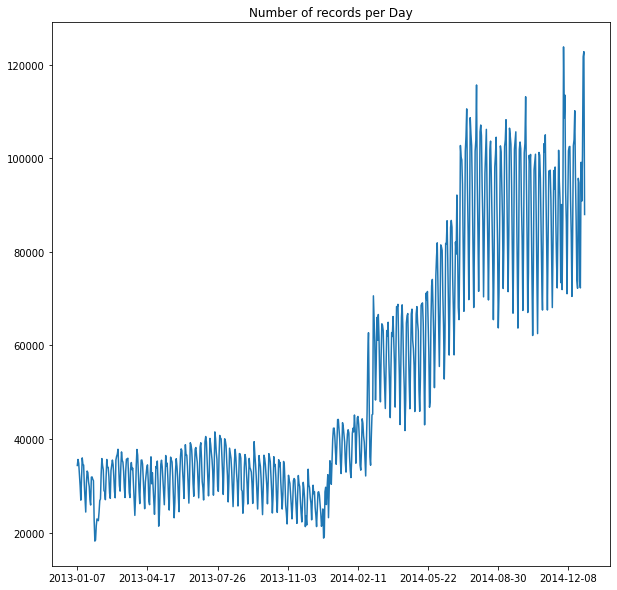

In [125]:

df.date_time.apply(lambda x: x[:10]).value_counts().sort_index().plot(figsize=(10,10),title= 'Number of records per Day')

plt.show()

<AxesSubplot:title={'center':'Number of records per day for cluster 12 and 90'}>

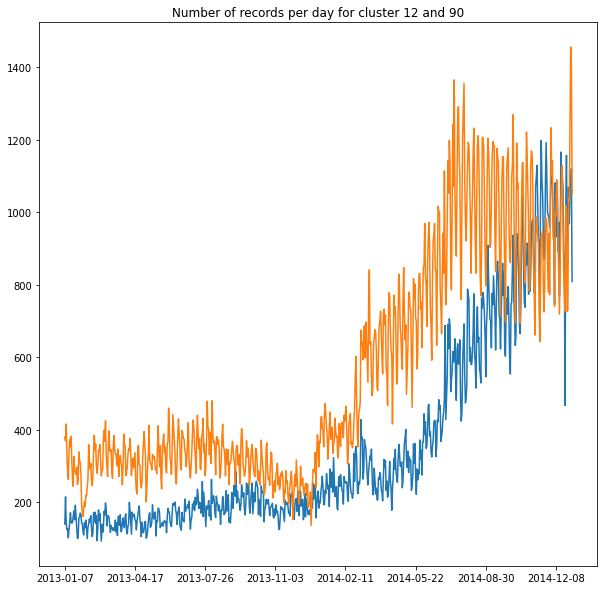

In [135]:
df.date_time.loc[df.hotel_cluster == 12 ].apply(lambda x: x[:10]).value_counts().sort_index().plot(figsize=(10,10),title= 'Number of records per day for cluster 12 and 90')
#df.date_time.loc[df.hotel_cluster == 60 ].apply(lambda x: x[:10]).value_counts().sort_index().plot(figsize=(10,10))
df.date_time.loc[df.hotel_cluster == 90 ].apply(lambda x: x[:10]).value_counts().sort_index().plot(figsize=(10,10))
#df.date_time.loc[df.hotel_cluster == 1 ].apply(lambda x: x[:10]).value_counts().sort_index().plot(figsize=(10,10))
#plt.show()

In [ ]:
da

<AxesSubplot:>

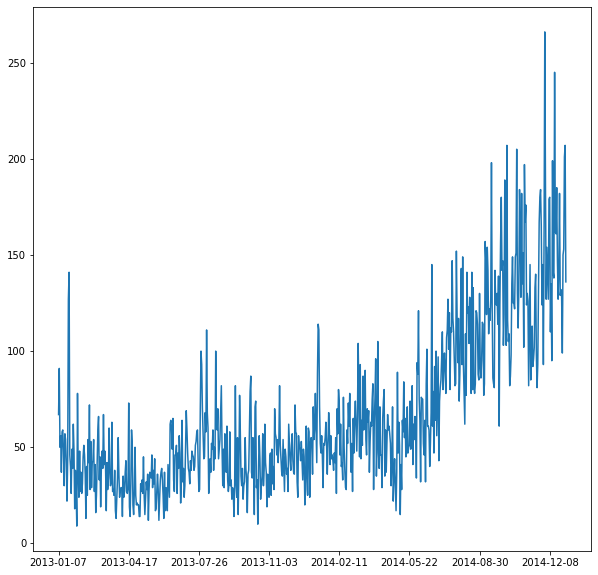

In [133]:
df.date_time.loc[df.hotel_cluster == 74 ].apply(lambda x: x[:10]).value_counts().sort_index().plot(figsize=(10,10))

In [ ]:
df.date_time.loc[df.is_booking == 1 ].apply(lambda x: x[:10]).value_counts().sort_index().plot(figsize=(10,10))

In [132]:
df.hotel_cluster.value_counts().sort_values()

74      48355
27     105040
88     107784
53     134812
35     139122
       ...   
65     670960
64     704734
48     754033
41     772743
91    1043720
Name: hotel_cluster, Length: 100, dtype: int64

In [97]:
df['date'] = df.date_time.apply(lambda x: x[:10])

In [103]:
df['month'] = df.date_time.apply(lambda x: x[:7])

In [101]:
df.date

0           2014-08-11
1           2014-08-11
2           2014-08-11
3           2014-08-09
4           2014-08-09
               ...    
37670288    2014-09-02
37670289    2014-09-08
37670290    2014-09-15
37670291    2014-09-18
37670292    2014-09-18
Name: date, Length: 37670293, dtype: object

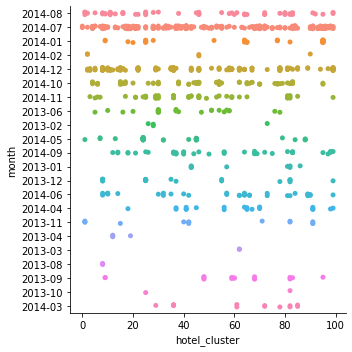

In [104]:
sns.catplot(data= df.loc[0:1000],x='hotel_cluster',y='month')

<AxesSubplot:>

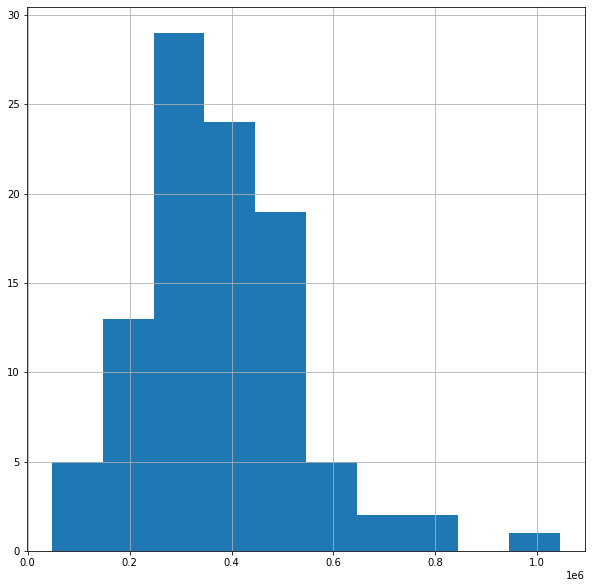

In [54]:
df.hotel_cluster.value_counts().hist(figsize=(10,10))

In [79]:
_ = df.hotel_cluster.value_counts()
_.sort_values()

74      48355
27     105040
88     107784
53     134812
35     139122
       ...   
65     670960
64     704734
48     754033
41     772743
91    1043720
Name: hotel_cluster, Length: 100, dtype: int64

In [81]:
df.hotel_cluster.loc[df.is_booking == 1].value_counts()

91    120972
48     85377
42     73123
59     66609
28     63978
       ...  
92      6433
87      6326
53      5124
27      2683
74      2465
Name: hotel_cluster, Length: 100, dtype: int64

<AxesSubplot:>

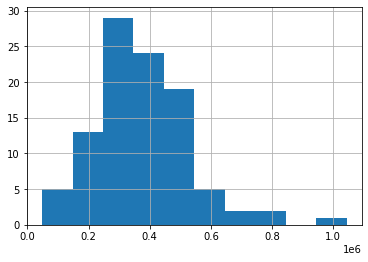

In [72]:
_.T.hist()

In [63]:
_ = pd.Series(df.hotel_cluster.value_counts().index,index=df.hotel_cluster.value_counts().values)

In [82]:
df2 = pd.read_csv('destinations.csv')
df2

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62101,64989,-2.145876,-2.158016,-2.216621,-2.158016,-2.006209,-2.102505,-2.216621,-2.157203,-2.216621,...,-2.216621,-2.158016,-2.158016,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.152024
62102,64990,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.176802,-2.203479,-2.203479,-2.203479,...,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.008885
62103,64991,-2.190567,-2.208308,-2.208308,-2.208308,-2.208308,-2.135493,-2.208308,-2.208308,-1.909808,...,-2.188935,-2.208308,-2.175594,-2.208308,-2.208308,-2.199347,-2.208308,-2.208308,-2.208308,-2.208308
62104,64992,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,...,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686


In [83]:
df2.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [84]:
pd.read_csv('sample_submission.csv')

,id,hotel_cluster
0,0,99 1
1,1,99 1
2,2,99 1
3,3,99 1
4,4,99 1
...,...,...
2528238,2528238,99 1
2528239,2528239,99 1
2528240,2528240,99 1
2528241,2528241,99 1


In [3]:
_ = pd.read_csv('sample_submission.csv')

In [5]:
_.hotel_cluster.value_counts()

99 1    2528243
Name: hotel_cluster, dtype: int64

In [6]:
train_df = pd.read_csv('train.csv') 

In [8]:
train_df.hotel_cluster.value_counts()

91    1043720
41     772743
48     754033
64     704734
65     670960
       ...   
35     139122
53     134812
88     107784
27     105040
74      48355
Name: hotel_cluster, Length: 100, dtype: int64

In [18]:
pd.set_option('display.max_columns', None)

In [9]:
train_sample = train_df.sample(10000)

In [35]:
train_sample.dropna().drop(columns=['date_time','user_id']).to_csv('sample_train.csv')

In [13]:
pd.DatetimeIndex(train_sample.date_time).month

Int64Index([ 4,  6,  7,  6,  4, 12,  5,  7,  6,  9,
            ...
             2,  1,  5,  3, 11,  1, 11,  6,  5,  3],
           dtype='int64', name='date_time', length=10000)